In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from keras.layers import normalization
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/My Drive/fer20131.csv')
print(data.shape)
data.head()
pixels = data['pixels'].tolist()
 
final_i = []
for pixel_sequence in pixels:
    face = [int(pixel) for pixel in pixel_sequence.split(' ')]
    face = np.asarray(face).reshape(48, 48)
    final_i.append(face.astype('float32'))
 
final_i = np.asarray(final_i)
final_i = np.expand_dims(final_i, -1)
 
emotions = pd.get_dummies(data['emotion']).to_numpy()

(35887, 3)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_i, emotions, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=41)

(None, 4608)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 1)]  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 48, 48, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 48, 48, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 48, 48, 32)   320         input_2[0][0]                    
_________________________________________________________________________________

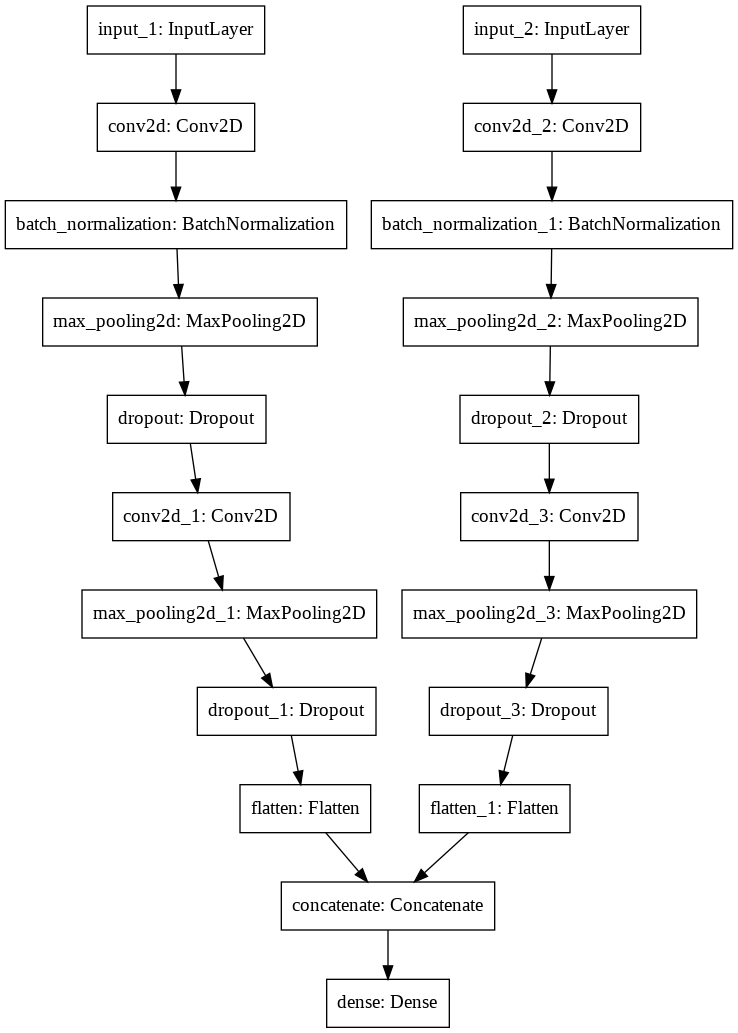

In [6]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models, Model
#from keras import optimizer
from tensorflow.keras.layers import Activation, Convolution2D, Dropout, Conv2D,Input, Concatenate, Dense
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D, BatchNormalization
#from tensorflow.keras.layers.merge import concatenate


input_shape=(48, 48, 1)

model1_in = Input(input_shape)
#model1 = models.Sequential()(model1)
model1 = (Convolution2D(filters=32, kernel_size=(3, 3), padding='same',activation='relu',
                             input_shape=input_shape))(model1_in)
model1 = (BatchNormalization())(model1)
model1 = (layers.MaxPooling2D(pool_size=(2, 2)))(model1)
model1 = (Dropout(.3))(model1)


model1 = (Convolution2D(filters=16, kernel_size=(3, 3), padding='same',activation='relu',
                             input_shape=input_shape))(model1)
model1 = (layers.MaxPooling2D(pool_size=(2, 2)))(model1)
model1 = (Dropout(.5))(model1)

model1 = (layers.Flatten())(model1)
#model1 = (layers.Dense(2034, activation='relu'))(model1)

model2_in = Input(input_shape)
#model2 = models.Sequential()(model2)
model2 = (Convolution2D(filters=32, kernel_size=(3, 3), padding='same',activation='relu',
                             input_shape=input_shape))(model2_in)
model2 = (BatchNormalization())(model2)
model2 = (layers.MaxPooling2D(pool_size=(2, 2)))(model2)
model2 = (Dropout(.3))(model2)


model2 = (Convolution2D(filters=16, kernel_size=(3, 3), padding='same',activation='relu',
                             input_shape=input_shape))(model2)
model2 = (layers.MaxPooling2D(pool_size=(2, 2)))(model2)
model2 = (Dropout(.5))(model2)

model2 = (layers.Flatten())(model2)
#model2 = (layers.Dense(2034, activation='relu'))(model2)



merged = Concatenate()([model1, model2])
print(merged.shape)
#output = Dense(4068, activation='relu')(merged)
output = Dense(7, activation='softmax')(merged)

model_final = Model(inputs=[model1_in,model2_in], outputs=output)
print(model_final.summary())
from tensorflow.keras.utils import plot_model
plot_model(model_final, to_file='model_final.png')

In [7]:
from tensorflow.keras.callbacks import Callback,ReduceLROnPlateau

model_final.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.9,patience=3,verbose=1)
modelF = model_final.fit([X_train,X_train], y_train, epochs=100, batch_size=64,
          validation_data=([X_val,X_val], y_val), shuffle=True, verbose=1, callbacks = [lr_reducer])

Epoch 1/100
455/455 [==============================] - 36s 11ms/step - loss: 2.0701 - accuracy: 0.2895 - val_loss: 1.6085 - val_accuracy: 0.3904
Epoch 2/100
455/455 [==============================] - 5s 10ms/step - loss: 1.5862 - accuracy: 0.3875 - val_loss: 1.5106 - val_accuracy: 0.4381
Epoch 3/100
455/455 [==============================] - 5s 10ms/step - loss: 1.5154 - accuracy: 0.4173 - val_loss: 1.4434 - val_accuracy: 0.4464
Epoch 4/100
455/455 [==============================] - 5s 11ms/step - loss: 1.4626 - accuracy: 0.4379 - val_loss: 1.4266 - val_accuracy: 0.4712
Epoch 5/100
455/455 [==============================] - 5s 10ms/step - loss: 1.4367 - accuracy: 0.4519 - val_loss: 1.4220 - val_accuracy: 0.4449
Epoch 6/100
455/455 [==============================] - 5s 10ms/step - loss: 1.4079 - accuracy: 0.4642 - val_loss: 1.3458 - val_accuracy: 0.4895
Epoch 7/100
455/455 [==============================] - 5s 10ms/step - loss: 1.3852 - accuracy: 0.4731 - val_loss: 1.3935 - val_accuracy

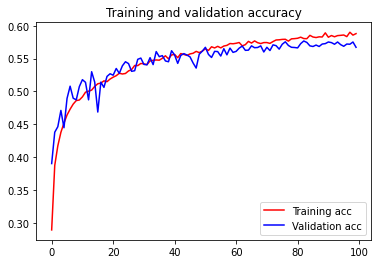

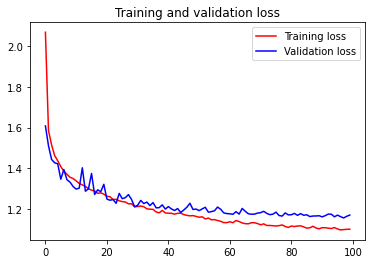

In [9]:
import matplotlib.pyplot as plt
#model_final.save('facial_emotion')

accuracy = modelF.history['accuracy']
val_accuracy = modelF.history['val_accuracy']
loss = modelF.history['loss']
validation_loss = modelF.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
acc = model_final.evaluate([X_test,X_test], y_test, verbose=1)
print ("model %s: %.2f%%" % (model_final.metrics_names[1], acc[1]*100))

113/113 [==============================] - 1s 4ms/step - loss: 1.1997 - accuracy: 0.5626
model accuracy: 56.26%


57/57 [==============================] - 0s 3ms/step


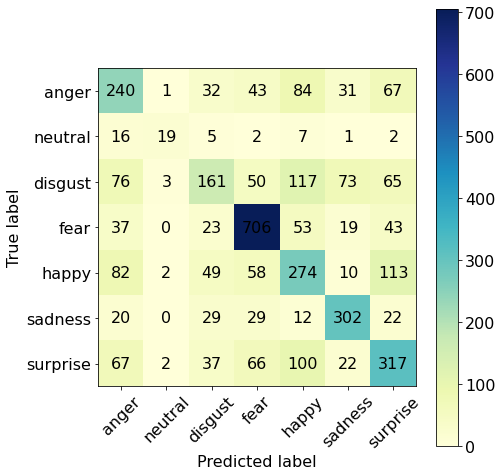

In [12]:
import matplotlib
from sklearn.metrics import confusion_matrix

# prediction and true labels
emotion = ['anger','neutral','disgust','fear','happy','sadness','surprise']
y_prob = model_final.predict([X_test,X_test], batch_size=64, verbose=1)
y_pred = [np.argmax(prob) for prob in y_prob]
y_true = [np.argmax(true) for true in y_test]

def plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.Blues):
    
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure(figsize=(7,7))
    matplotlib.rcParams.update({'font.size': 16})
    ax  = fig.add_subplot(111)
    matrix = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    fig.colorbar(matrix) 
    for i in range(0,7):
        for j in range(0,7):  
            ax.text(j,i,cm[i,j],va='center', ha='center')
    ticks = np.arange(len(emotion))
    ax.set_xticks(ticks)
    ax.set_xticklabels(emotion, rotation=45)
    ax.set_yticks(ticks)
    ax.set_yticklabels(emotion)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.YlGnBu)
plt.show()

3589
3589


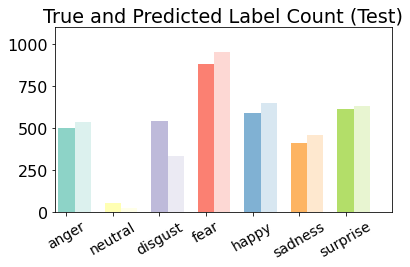

In [15]:
import brewer2mpl

def plot_distribution2(y_true, y_pred):
    
    colorset = brewer2mpl.get_map('Set3', 'qualitative', 7).mpl_colors
    ind = np.arange(1.5,8,1)  # the x locations for the groups
    width = 0.35   
    fig, ax = plt.subplots()
    true = ax.bar(ind, np.bincount(y_true), width, color=colorset, alpha=1.0)
    pred = ax.bar(ind + width, np.bincount(y_pred), width, color=colorset, alpha=0.3)
    ax.set_xticks(np.arange(1.5,8,1))
    ax.set_xticklabels(emotion, rotation=30, fontsize=14)
    ax.set_xlim([1.25, 8.5])
    ax.set_ylim([0, 1100])
    ax.set_title('True and Predicted Label Count (Test)')
    plt.tight_layout()
    plt.show()


print(len(y_true))
print(len(y_pred)) 
plot_distribution2(y_true, y_pred)